##### Copyright 2018 The TensorFlow Authors.
inspired from Tensorflow Tutorial for ImageDateGenerator and augmentation Dogs&Cats

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [10]:
PATH = '/mnt/7ac346ab-63e9-4291-b1d0-6ac9ad09954a/work/covid/COVID-19RadiographyDatabase/data'
train_dir = os.path.join(PATH, '/')
validation_dir = os.path.join(PATH, 'validation')
(IMG_HEIGHT, IMG_WIDTH)=(128,128)

## Load data

In [72]:
train_datagen = ImageDataGenerator(rescale=1./255,
        validation_split=0.2)

train_data_gen = train_datagen.flow_from_directory(batch_size=32,color_mode= "grayscale",
                                                           directory=PATH,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse', subset='training')

Found 2325 images belonging to 3 classes.


In [73]:
val_data_gen = train_datagen.flow_from_directory(batch_size=32,
                                                              directory=PATH,color_mode= "grayscale",
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='sparse', subset='validation')

Found 580 images belonging to 3 classes.


In [74]:
total_train = 2325
total_val=580
batch_size=32

### Visualize training images

Visualize the training images by extracting a batch of images from the training generator—which is 32 images in this example—then plot five of them with `matplotlib`.

In [75]:
sample_training_images, labels = next(train_data_gen)

The `next` function returns a batch from the dataset. The return value of `next` function is in form of `(x_train, y_train)` where x_train is training features and y_train, its labels. Discard the labels to only visualize the training images.

In [76]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr, labels):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax,l in zip( images_arr, axes, labels):
        ax.imshow(img.reshape((IMG_HEIGHT, IMG_WIDTH)))
        ax.axis('off')
        ax.set_title(l, loc='center', y=1.1)
    plt.tight_layout()
    plt.show()

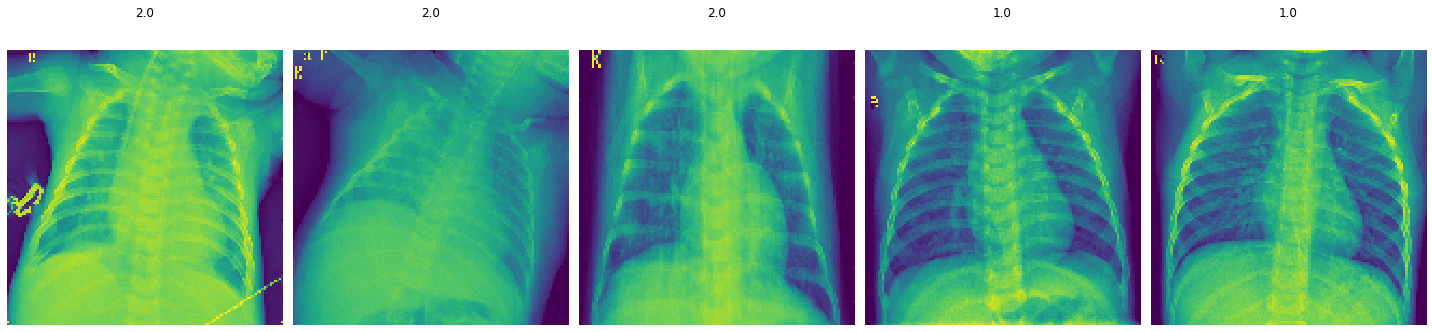

In [77]:
plotImages(sample_training_images[:5], labels[:5])

In [78]:
sample_training_images[0]

array([[[0.05882353],
        [0.05882353],
        [0.05882353],
        ...,
        [0.6745098 ],
        [0.5529412 ],
        [0.5137255 ]],

       [[0.0509804 ],
        [0.0509804 ],
        [0.04705883],
        ...,
        [0.67058825],
        [0.5568628 ],
        [0.49803925]],

       [[0.04313726],
        [0.03137255],
        [0.02745098],
        ...,
        [0.60784316],
        [0.54509807],
        [0.5019608 ]],

       ...,

       [[0.40784317],
        [0.5058824 ],
        [0.58431375],
        ...,
        [0.07450981],
        [0.07843138],
        [0.07450981]],

       [[1.        ],
        [0.49803925],
        [0.5882353 ],
        ...,
        [0.07843138],
        [0.07843138],
        [0.9725491 ]],

       [[0.43137258],
        [0.52156866],
        [0.5921569 ],
        ...,
        [0.07450981],
        [0.07843138],
        [0.08627451]]], dtype=float32)

## Create the model

The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 512 units on top of it that is activated by a `relu` activation function.

In [79]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

### Compile the model

For this tutorial, choose the *ADAM* optimizer and *binary cross entropy* loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument.

In [80]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary

View all the layers of the network using the model's `summary` method:

In [81]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 16384)            

### Train the model

Use the `fit_generator` method of the `ImageDataGenerator` class to train the network.

In [82]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=10, #total_train // batch_size,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=10# total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 10 steps
Epoch 1/10
10/10 [==============================] - 8s 844ms/step - loss: 0.9969 - accuracy: 0.5469 - val_loss: 0.8644 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 9s 856ms/step - loss: 0.8546 - accuracy: 0.7156 - val_loss: 0.7437 - val_accuracy: 0.8313
Epoch 3/10
10/10 [==============================] - 9s 850ms/step - loss: 0.7826 - accuracy: 0.7844 - val_loss: 0.7035 - val_accuracy: 0.8500
Epoch 4/10
10/10 [==============================] - 9s 853ms/step - loss: 0.7555 - accuracy: 0.7896 - val_loss: 0.6916 - val_accuracy: 0.8687
Epoch 5/10
10/10 [==============================] - 9s 856ms/step - loss: 0.7100 - accuracy: 0.8406 - val_loss: 0.6719 - val_accuracy: 0.8906
Epoch 6/10
10/10 [==============================] - 9s 876ms/step - loss: 0.6767 - accuracy: 0.8813 - val_loss: 0.6795 - val_accuracy: 0.8750
Epoch 7/10
10/10 [==============================] - 8s 8

### Visualize training results

Now visualize the results after training the network.

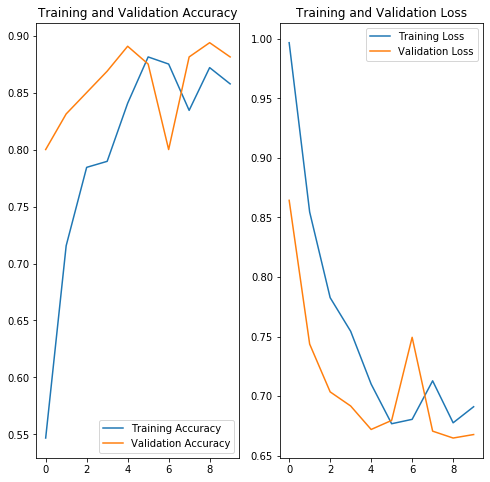

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()